# Parcial 1 - Análisis de Datos

Nicolas Riveros Barrera - 20221678047<br>
Hernando Alexander Poveda Torres - 20221678046

--------------------------------

Importar librerías necesarias

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [147]:
import seaborn as sns # Cambiar

-------------
Cargar el conjunto de datos

In [148]:
df = pd.read_csv('../data/titanic.csv')

df

,PassengerId,Survived,Pclass,Name,gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Preprocesamiento de los datos


Verificar los datos faltantes

In [1]:
df.isnull().sum()

NameError: name 'df' is not defined

Imputar los valores faltantes en las columnas 'Age' y 'Embarked'

In [150]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

Eliminar las columnas 'PassengerId', 'Name', 'Ticket' y 'Cabin'

In [151]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

Transformar las variables categóricas a numéricas

In [1]:
df['gender'] = df['gender'].map({'female': 0, 'male': 1}).astype(int)
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

df

NameError: name 'df' is not defined

> En este preprocesamiento, se han imputado los valores faltantes en las columnas 'Age' y 'Embarked' utilizando la mediana y la moda, respectivamente. Luego, se han eliminado las columnas 'PassengerId', 'Name', 'Ticket' y 'Cabin', que no son relevantes para nuestro análisis. Finalmente, se han transformado las variables categóricas 'gender' y 'Embarked' a variables numéricas.

## Análisis exploratorio de los datos

<Axes: xlabel='Survived', ylabel='count'>

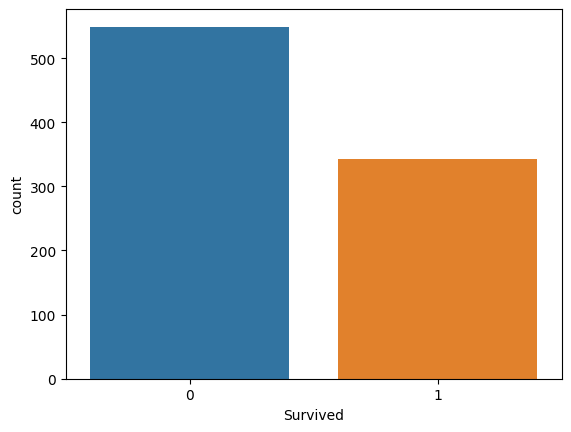

In [154]:
# Verificar la distribución de la variable objetivo 'Survived'
sns.countplot(x='Survived', data=df)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

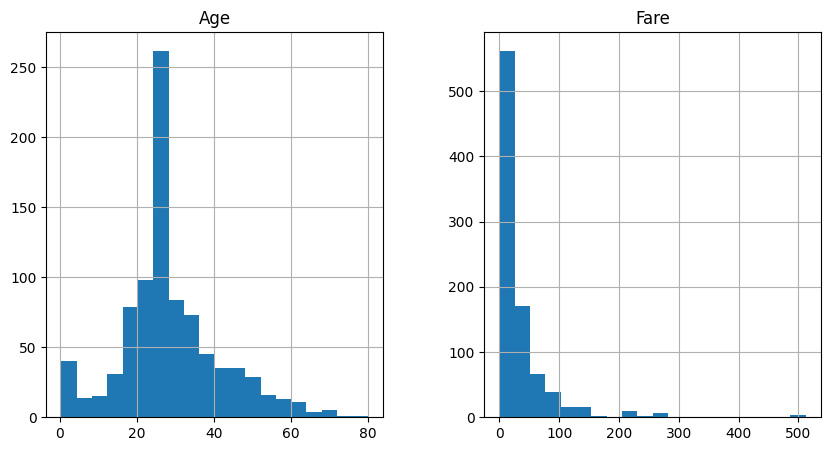

In [155]:
# Verificar la distribución de las variables numéricas
df[['Age', 'Fare']].hist(bins=20, figsize=(10, 5))

<Axes: xlabel='Survived', ylabel='Fare'>

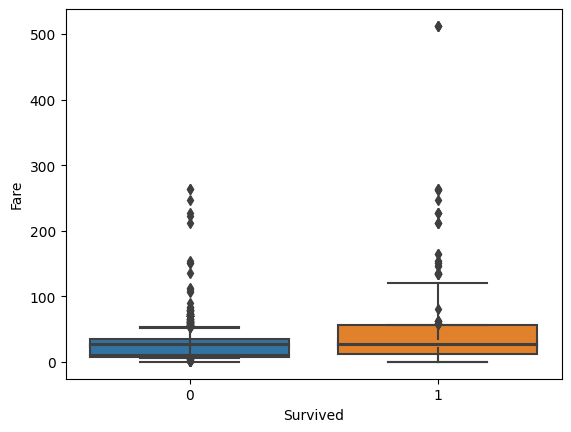

In [156]:
# Verificar la relación entre la variable objetivo y las variables numéricas
sns.boxplot(x='Survived', y='Age', data=df)
sns.boxplot(x='Survived', y='Fare', data=df)

<Axes: xlabel='Survived', ylabel='count'>

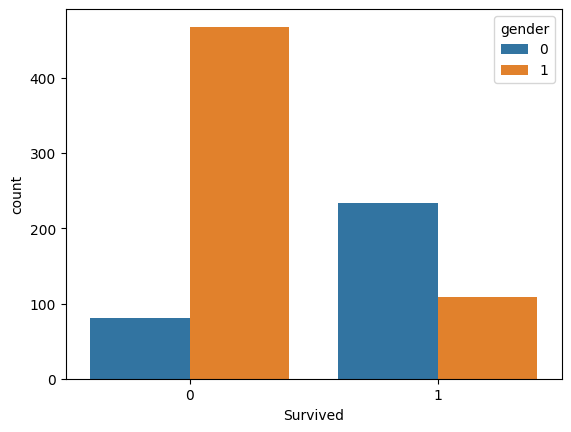

In [157]:
# Verificar la relación entre la variable objetivo y las variables categóricas
sns.countplot(x='Survived', hue='gender', data=df)

<Axes: xlabel='Survived', ylabel='count'>

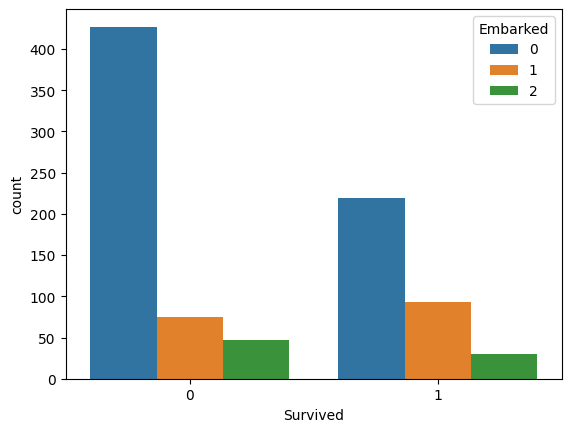

In [158]:
sns.countplot(x='Survived', hue='Embarked', data=df)

<Axes: xlabel='Survived', ylabel='count'>

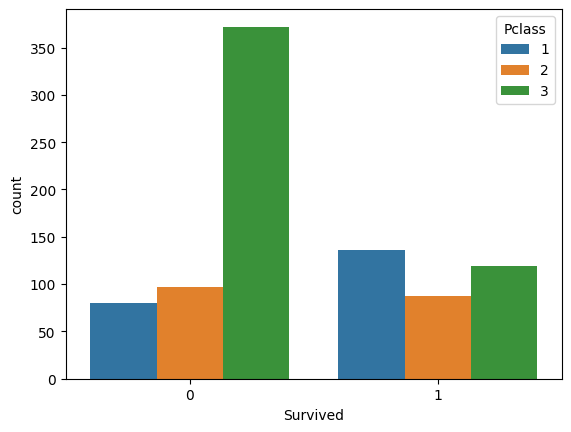

In [159]:
sns.countplot(x='Survived', hue='Pclass', data=df)

## Crear un modelo de regresión logística

In [160]:
# Separar las variables independientes y dependiente
x = df.drop('Survived', axis=1)
y = df['Survived']

# Dividir los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión logística
logreg = LogisticRegression()

# Entrenar el modelo
logreg.fit(x_train, y_train)

# Realizar las predicciones
y_pred = logreg.predict(x_test)

# Evaluar el modelo
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score:', accuracy_score(y_test, y_pred))
print('Precision score:', precision_score(y_test, y_pred))
print('Recall score:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

Accuracy score: 0.7988826815642458
Precision score: 0.7714285714285715
Recall score: 0.7297297297297297
F1 score: 0.75


/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Prueba

In [161]:
# Crear un dataframe con las características de la persona que deseas analizar
new_passenger = pd.DataFrame({'Pclass': [1], 'gender': [0], 'Age': [30], 'SibSp': [0], 'Parch': [0], 'Fare': [80], 'Embarked': [1]})

# Realizar la predicción utilizando el modelo de regresión logística
prediction = logreg.predict(new_passenger)

# Imprimir la predicción


La persona pudo haber sobrevivido.


In [165]:
# Función para predecir la supervivencia de un pasajero
def predict_survival(text, passenger):
  prediction = logreg.predict(passenger)
  if prediction == 0:
    print(text, ' no sobrevivió')
  else:
    print(text, 'sobrevivió')

#### Ejemplos

1. Mujer, 25 años, clase 2, sin familiares a bordo, pagó una tarifa de 20, por el puerto C.
2. Hombre, 40 años, clase 1, viajando solo, pagó una tarifa de 100, por el puerto S.
3. Hombre, 20 años, clase 3, con dos hermanos a bordo, pagó una tarifa de 7, por el puerto S.
4. Mujer, 35 años, clase 1, con un esposo a bordo, pagó una tarifa de 150, por el puerto Q.
5. Hombre, 60 años, clase 3, viajando solo, pagó una tarifa de 5, por el puerto C.
6. Mujer, 28 años, clase 2, con una amiga a bordo, pagó una tarifa de 30, por el puerto S.
7. Hombre, 18 años, clase 3, con un padre a bordo, pagó una tarifa de 8, por el puerto Q.
8. Mujer, 50 años, clase 1, con un hijo adulto a bordo, pagó una tarifa de 200, por el puerto Q.
9. Hombre, 45 años, clase 2, viajando solo, pagó una tarifa de 50, por el puerto S.
10. Mujer, 22 años, clase 3, con una hermana a bordo, pagó una tarifa de 15, por el puerto C.

In [166]:
# Creación de dataframes con características de pasajeros para predecir
# Ejemplo 1
passenger_1 = pd.DataFrame({'Pclass': [2], 'gender': [0], 'Age': [25], 'SibSp': [0], 'Parch': [0], 'Fare': [20], 'Embarked': [1]})
predict_survival("Pasajero 1 - ¿Sobrevivió?:", passenger_1)

# Ejemplo 2
passenger_2 = pd.DataFrame({'Pclass': [1], 'gender': [1], 'Age': [40], 'SibSp': [0], 'Parch': [0], 'Fare': [100], 'Embarked': [0]})
predict_survival("Pasajero 2 - ¿Sobrevivió?:", passenger_2)

# Ejemplo 3
passenger_3 = pd.DataFrame({'Pclass': [3], 'gender': [1], 'Age': [20], 'SibSp': [2], 'Parch': [0], 'Fare': [7], 'Embarked': [0]})
predict_survival("Pasajero 3 - ¿Sobrevivió?:", passenger_3)

# Ejemplo 4
passenger_4 = pd.DataFrame({'Pclass': [1], 'gender': [0], 'Age': [35], 'SibSp': [0], 'Parch': [1], 'Fare': [150], 'Embarked': [2]})
predict_survival("Pasajero 4 - ¿Sobrevivió?:", passenger_4)

# Ejemplo 5
passenger_5 = pd.DataFrame({'Pclass': [3], 'gender': [1], 'Age': [60], 'SibSp': [0], 'Parch': [0], 'Fare': [5], 'Embarked': [1]})
predict_survival("Pasajero 5 - ¿Sobrevivió?:", passenger_5)

# Ejemplo 6
passenger_6 = pd.DataFrame({'Pclass': [2], 'gender': [0], 'Age': [28], 'SibSp': [1], 'Parch': [0], 'Fare': [30], 'Embarked': [0]})
predict_survival("Pasajero 6 - ¿Sobrevivió?:", passenger_6)

# Ejemplo 7
passenger_7 = pd.DataFrame({'Pclass': [3], 'gender': [1], 'Age': [18], 'SibSp': [0], 'Parch': [1], 'Fare': [8], 'Embarked': [2]})
predict_survival("Pasajero 7 - ¿Sobrevivió?:", passenger_7)

# Ejemplo 8
passenger_8 = pd.DataFrame({'Pclass': [1], 'gender': [0], 'Age': [22], 'SibSp': [1], 'Parch': [1], 'Fare': [200], 'Embarked': [2]})
predict_survival("Pasajero 8 - ¿Sobrevivió?:", passenger_8)

# Ejemplo 9
passenger_9 = pd.DataFrame({'Pclass': [2], 'gender': [1], 'Age': [45], 'SibSp': [1], 'Parch': [1], 'Fare': [50], 'Embarked': [0]})
predict_survival("Pasajero 9 - ¿Sobrevivió?:", passenger_9)

# Ejemplo 10
passenger_10 = pd.DataFrame({'Pclass': [3], 'gender': [0], 'Age': [38], 'SibSp': [0], 'Parch': [3], 'Fare': [15], 'Embarked': [1]})
predict_survival("Pasajero 10 - ¿Sobrevivió?:", passenger_10)

Pasajero 1 - ¿Sobrevivió?: sobrevivió
Pasajero 2 - ¿Sobrevivió?:  no sobrevivió
Pasajero 3 - ¿Sobrevivió?:  no sobrevivió
Pasajero 4 - ¿Sobrevivió?: sobrevivió
Pasajero 5 - ¿Sobrevivió?:  no sobrevivió
Pasajero 6 - ¿Sobrevivió?: sobrevivió
Pasajero 7 - ¿Sobrevivió?:  no sobrevivió
Pasajero 8 - ¿Sobrevivió?: sobrevivió
Pasajero 9 - ¿Sobrevivió?:  no sobrevivió
Pasajero 10 - ¿Sobrevivió?: sobrevivió
